## IART Algerian Forest Fires Dataset 

## Project Description

The dataset used in this project consists of historical data collected in the regions of Bejaia and Sidi-Bel Abbes. It contains information related to environmental characteristics such as: temperature
humidity, wind speed, precipitation, among other relevant variables for forest fire prediction. In addition, the dataset also includes the target variable, indicating whether the region was on fire or not in a given period of months.


## Dataset Description 


1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) 
Weather data observations 
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8 
FWI Components 
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system: 7 to 220.4 
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 
11. Fire Weather Index (FWI) Index: 0 to 31.1 
12. Classes: fire, not fire

## Data Pre-Processing


In [4]:

import pandas as pd
import seaborn as sb
import sklearn as skl
#import imblearn as imbl
from matplotlib import pyplot as plt

**Load Data**

In [5]:

import pandas
dataset = pandas.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,not fire


In [6]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


Checking for missing values 

In [7]:
# Number of null values (for each column and total)

dataset.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

In [8]:
#Numero de linhas e colunas
dataset.shape

(244, 15)

In [9]:
print(dataset.dtypes)


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region          object
Classes         object
dtype: object


In [10]:

#Tratamento de dados
dataset['Region'] = dataset['Region'].replace({'Bejaia': 1, 'Sidi-Bel Abbes': 0})


In [11]:
print(dataset.dtypes)

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region           int64
Classes         object
dtype: object


In [15]:
algerian_forest_data = dataset.copy()
# Remove unnecessary column
algerian_forest_data = algerian_forest_data.drop(['year','month','day'], axis=1)


In [14]:
print(algerian_forest_data)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Region   
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5       1  \
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4       1   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1       1   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0       1   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5       1   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...     ...   
239           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5       0   
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0       0   
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2       0   
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7       0   
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5       0   

      Classes  
0    not fire  
1    not fire  
2    not fire  
3    not fire  
4    no

In [16]:
print(algerian_forest_data.columns)

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'Classes'],
      dtype='object')


In [17]:
print(algerian_forest_data['Classes'].unique())

['not fire' 'fire']


In [18]:
print(algerian_forest_data['Region'].unique())

[1 0]


In [20]:
algerian_forest_data.loc[
                         (algerian_forest_data['Temperature'].isnull()) |
                         (algerian_forest_data['RH'].isnull()) |
                         (algerian_forest_data['Ws'].isnull()) |
                         (algerian_forest_data['Rain'].isnull()) |
                         (algerian_forest_data['FFMC'].isnull()) |
                         (algerian_forest_data['DMC'].isnull()) |
                         (algerian_forest_data['DC'].isnull()) |
                         (algerian_forest_data['ISI'].isnull()) |
                         (algerian_forest_data['BUI'].isnull()) |
                         (algerian_forest_data['FWI'].isnull())]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes


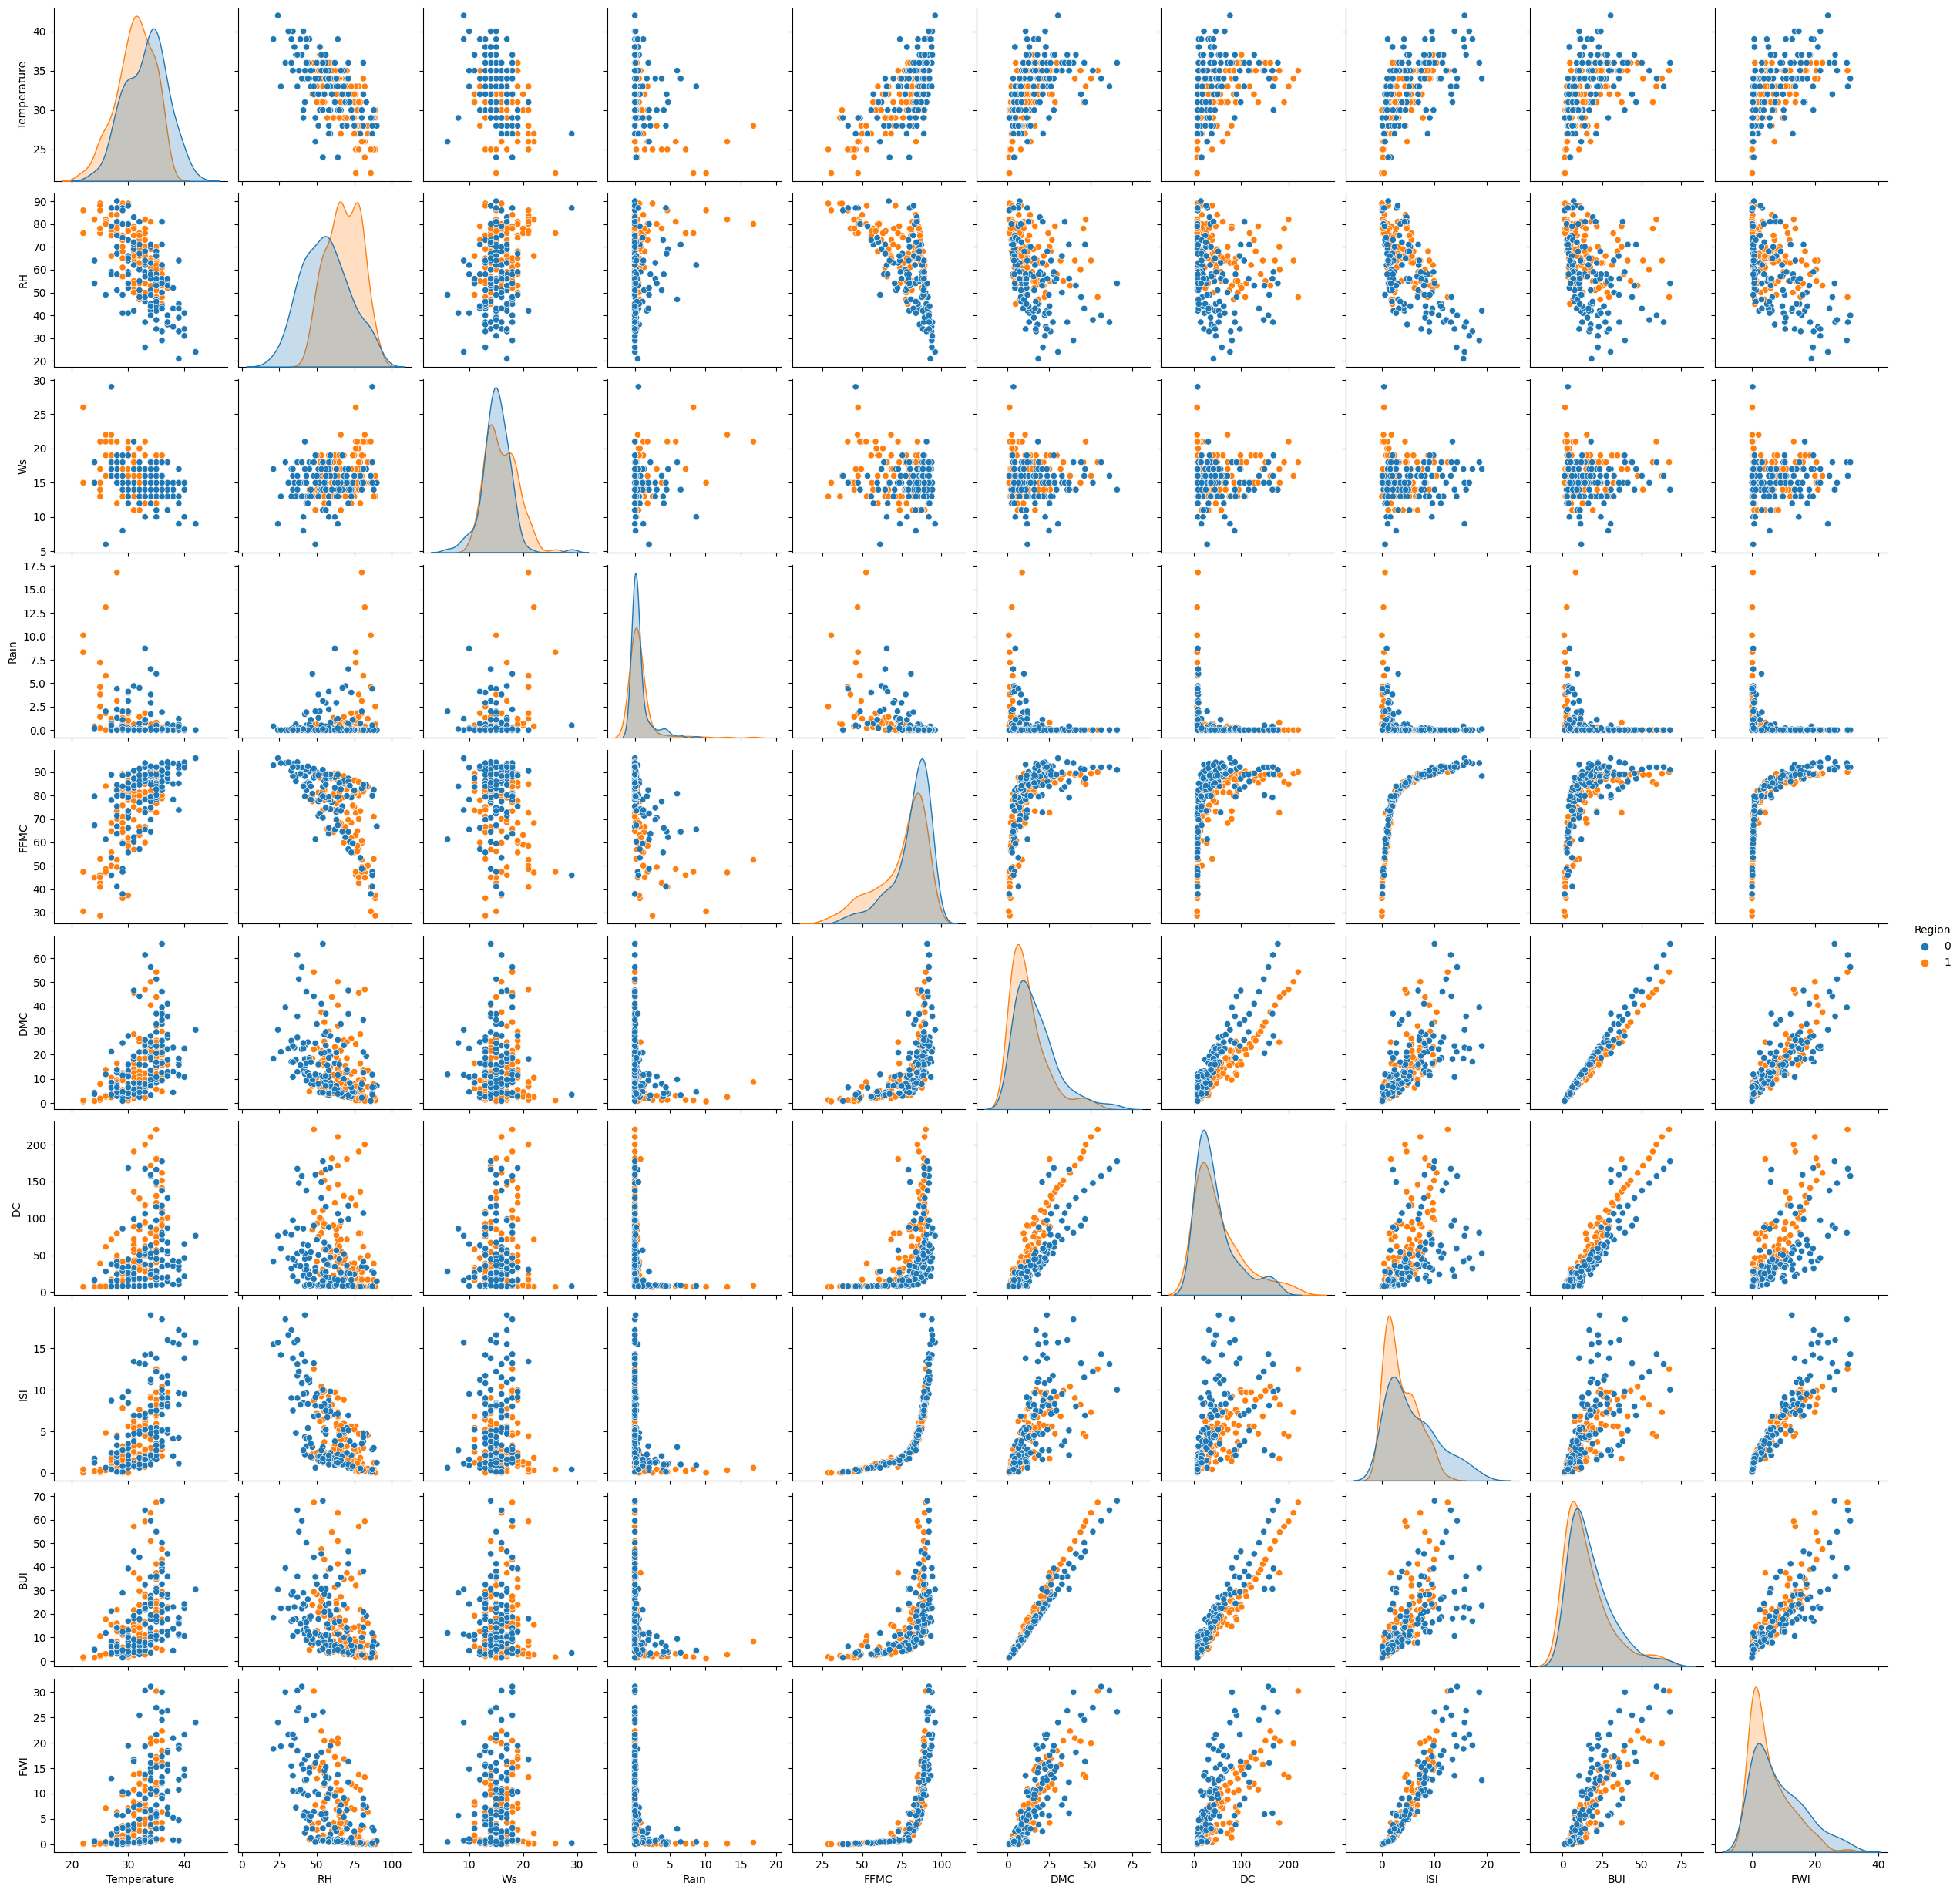

In [21]:


# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(algerian_forest_data, hue='Region')

<Axes: xlabel='Classes', ylabel='count'>

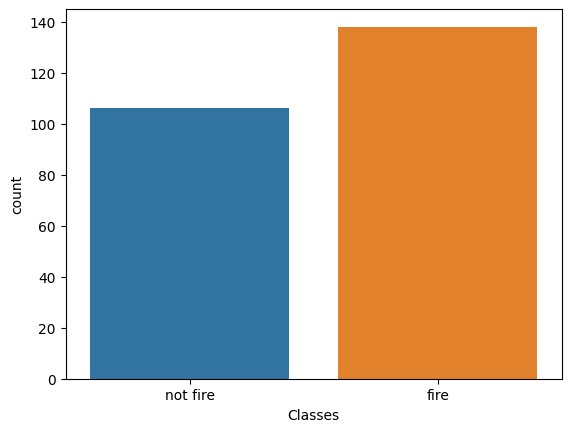

In [28]:
sb.countplot(x=algerian_forest_data.Classes)

faz parte do tratamento de dados, organizar isto 

temperatura, umidade relativa, velocidade do vento, precipitação, índice de incêndio -------- notfire-fire



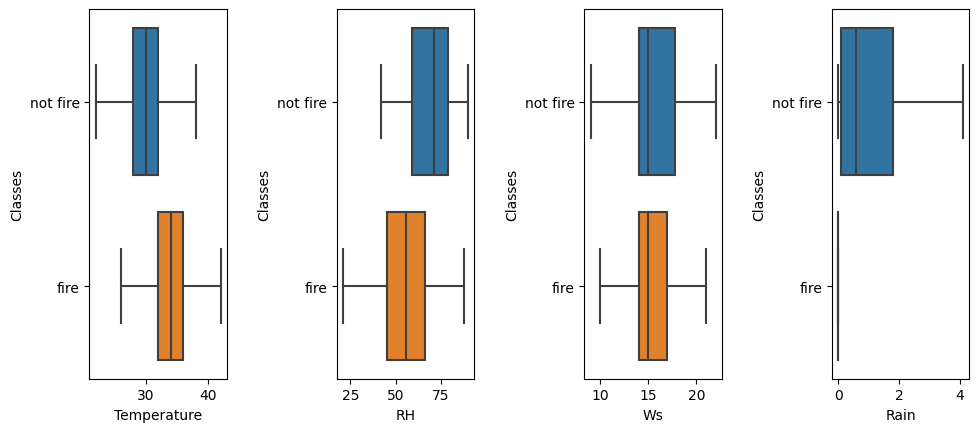

In [31]:
fig, ax = plt.subplots(1, 4)

sb.boxplot(x=algerian_forest_data["Temperature"], y=algerian_forest_data["Classes"], orient="h", showfliers=False, ax=ax[0])
sb.boxplot(x=algerian_forest_data["RH"], y=algerian_forest_data["Classes"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=algerian_forest_data["Ws"], y=algerian_forest_data["Classes"], orient="h", showfliers=False, ax=ax[2])
sb.boxplot(x=algerian_forest_data["Rain"], y=algerian_forest_data["Classes"], orient="h", showfliers=False, ax=ax[3])


plt.subplots_adjust(wspace=0.8, right=1.5, hspace=1.5)
plt.show()


Abordagem mais detalhada para cada regiao 

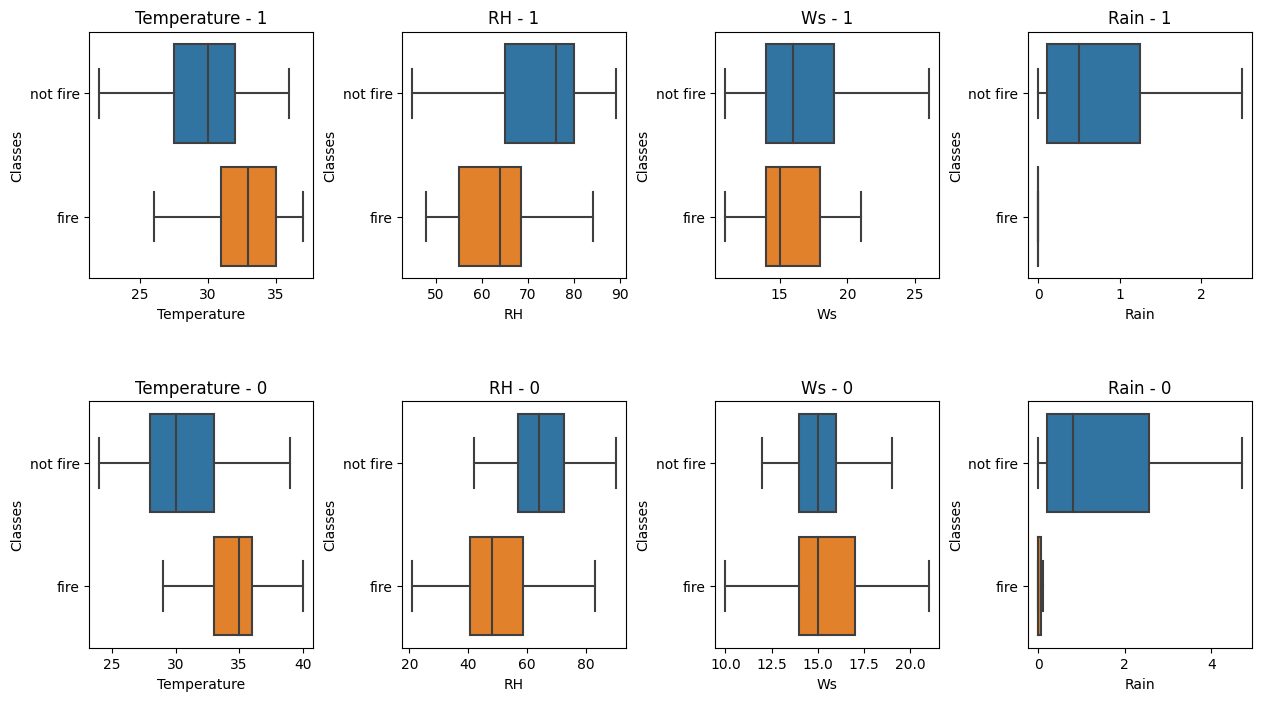

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de regiões
regioes = algerian_forest_data['Region'].unique()

# Criando subplots para cada região
fig, axes = plt.subplots(len(regioes), 4, figsize=(15, len(regioes) * 4))

# Iterando pelas regiões
for i, regiao in enumerate(regioes):
    # Filtrando os dados por região
    dados_regiao = algerian_forest_data[algerian_forest_data['Region'] == regiao]
    
    # Plotando os gráficos de caixa para cada variável
    sns.boxplot(x=dados_regiao["Temperature"], y=dados_regiao["Classes"], orient="h", showfliers=False, ax=axes[i, 0])
    sns.boxplot(x=dados_regiao["RH"], y=dados_regiao["Classes"], orient="h", showfliers=False, ax=axes[i, 1])
    sns.boxplot(x=dados_regiao["Ws"], y=dados_regiao["Classes"], orient="h", showfliers=False, ax=axes[i, 2])
    sns.boxplot(x=dados_regiao["Rain"], y=dados_regiao["Classes"], orient="h", showfliers=False, ax=axes[i, 3])
    
    # Definindo títulos para os subplots
    axes[i, 0].set_title(f"Temperature - {regiao}")
    axes[i, 1].set_title(f"RH - {regiao}")
    axes[i, 2].set_title(f"Ws - {regiao}")
    axes[i, 3].set_title(f"Rain - {regiao}")

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Exibindo o gráfico
plt.show()


concluir o que esta no grafico

In [33]:
#para Tentarmos fazer esta correlaçao tivemos novamente que fazer tratamento de dados 

algerian_forest_data['Classes'] = algerian_forest_data['Classes'].replace({'fire': 1, 'not fire': 0})


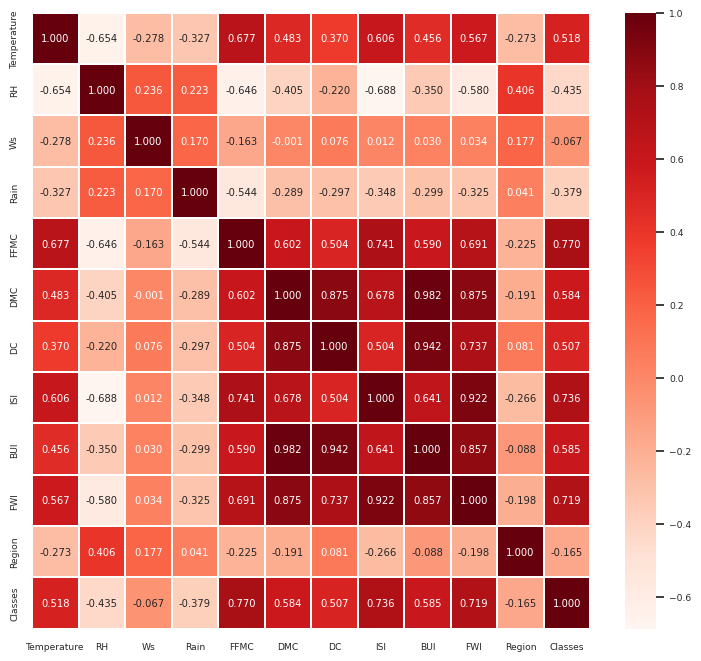

In [35]:
correlation_mat = algerian_forest_data.corr() 
sb.set(font_scale=0.6)
f, ax = plt.subplots(figsize=(9, 8)) 
sb.heatmap(correlation_mat,ax=ax, annot=True, cmap="Reds", linewidths=0.3,fmt='.3f')
sb.set(font_scale=1)
plt.show()

Correlação positiva: Se o valor de correlação entre duas variáveis for próximo de 1, indica uma correlação positiva forte. Isso significa que quando uma variável aumenta, a outra também tende a aumentar. Por exemplo, se 'Temperature' e 'FFMC' tiverem uma correlação positiva alta, significa que, em geral, à medida que a temperatura aumenta, o índice FFMC também tende a aumentar.
Correlação negativa: Se o valor de correlação entre duas variáveis for próximo de -1, indica uma correlação negativa forte. Isso significa que quando uma variável aumenta, a outra tende a diminuir. Por exemplo, se 'DMC' e 'ISI' tiverem uma correlação negativa alta, significa que, em geral, à medida que o conteúdo de umidade do dossel (DMC) aumenta, o índice de perigo de incêndio (ISI) tende a diminuir.

## Conclusoes

## Preparing the data

In [38]:
columns = list(algerian_forest_data.columns.values)

# filter the columns (remove the labels)
columns = [c for c in columns if c not in ["Classes"]]

X = algerian_forest_data[columns]

X_positive_corr = algerian_forest_data[["Temperature", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]]

Y = algerian_forest_data["Classes"]

print(X.shape, Y.shape)

print(X_positive_corr.shape, Y.shape)

(244, 11) (244,)
(244, 7) (244,)


In [39]:
from sklearn.model_selection import train_test_split

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape)

(X_corr_train,
 X_corr_test,
 y_corr_train,
 y_corr_test) = train_test_split(X_positive_corr, Y, test_size=0.75, random_state=1)

(195, 11) (49, 11)


Visto que fire e not fire estao ambos perto dos 50% pensamos que nao era necessario fazer oversampling/undersampling
No entanto, a escolha entre essas técnicas depende do desempenho do modelo e da qualidade dos resultados obtidos. Você pode experimentar diferentes abordagens, como oversampling, undersampling

Training Models
    - Decision Tree
    - Neural Networks
    - K-NN

Acurácia (Accuracy): É a proporção de previsões corretas em relação ao total de previsões. Essa métrica é adequada quando as classes têm distribuição equilibrada, ou seja, quando o número de amostras em cada classe é aproximadamente igual.
Precisão (Precision): Também conhecida como valor preditivo positivo, é a proporção de verdadeiros positivos (amostras corretamente previstas como positivas) em relação ao total de previsões positivas (verdadeiros positivos + falsos positivos). A precisão mede a capacidade do modelo de fazer previsões corretas para a classe positiva.
Recall (Revocação): Também conhecido como taxa de verdadeiros positivos ou sensibilidade, é a proporção de verdadeiros positivos em relação ao total de amostras positivas (verdadeiros positivos + falsos negativos). O recall mede a capacidade do modelo de identificar corretamente as amostras positivas.
F1-score: É uma métrica que combina a precisão e o recall em uma única pontuação. O F1-score é a média harmônica da precisão e do recall e fornece uma medida balanceada do desempenho do modelo.

In [117]:
#imports 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [118]:
#Pre-processing 

X = algerian_forest_data.drop('Classes', axis=1)
y = algerian_forest_data['Classes']

In [119]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
#perceber porque sao estes os valores para o test_size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)

In [121]:
# Train the classifier on the training set

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)

dtc_all_predictions = decision_tree_classifier.predict(X_test)

dtc_score = metrics.accuracy_score(y_test, dtc_all_predictions)
print(dtc_score)

dtc_all_report = classification_report(y_test, dtc_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, dtc_all_predictions)}\n\nClassification report:\n {classification_report(y_test, dtc_all_predictions)}\n")

0.9836065573770492
Original dataset:
 Confusion matrix: 
[[19  1]
 [ 0 41]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.98      1.00      0.99        41

    accuracy                           0.98        61
   macro avg       0.99      0.97      0.98        61
weighted avg       0.98      0.98      0.98        61




In [124]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred, pos_label='1'))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion matrix:
 [[19  1]
 [ 0 41]]


ValueError: pos_label=1 is not a valid label. It should be one of [0, 1]

## Neural Networks

In [108]:
nn = MLPClassifier(max_iter=3000)

nn.fit(X_train, y_train)
nn_all_predictions = nn.predict(X_test)
nn_score = metrics.accuracy_score(y_test, nn_all_predictions)
print(nn_score)
nn_all_report = classification_report(y_test, nn_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, nn_all_predictions)}\n\nClassification report:\n {classification_report(y_test, nn_all_predictions)}\n")

0.9836065573770492
Original dataset:
 Confusion matrix: 
[[19  1]
 [ 0 41]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.98      1.00      0.99        41

    accuracy                           0.98        61
   macro avg       0.99      0.97      0.98        61
weighted avg       0.98      0.98      0.98        61




In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=100)
#mlp = MLPClassifier(hidden_layer_sizes=(100,15), activation='relu', solver='adam', max_iter=200)
#mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=200)
#mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=200)
mlp = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='adam', max_iter=200)

** Balanced Dataset **

## K-NN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_all_predictions = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test, knn_all_predictions)
print(knn_score)

knn_all_report = classification_report(y_test, knn_all_predictions, output_dict=True)
print(f"Original dataset:\nConfusion matrix:\n{confusion_matrix(y_test, knn_all_predictions)}\n\nClassification report:")
print(knn_all_report)


0.9344262295081968
Original dataset:
Confusion matrix:
[[18  2]
 [ 2 39]]

Classification report:
{'0': {'precision': 0.9, 'recall': 0.9, 'f1-score': 0.9, 'support': 20}, '1': {'precision': 0.9512195121951219, 'recall': 0.9512195121951219, 'f1-score': 0.9512195121951219, 'support': 41}, 'accuracy': 0.9344262295081968, 'macro avg': {'precision': 0.9256097560975609, 'recall': 0.9256097560975609, 'f1-score': 0.9256097560975609, 'support': 61}, 'weighted avg': {'precision': 0.9344262295081968, 'recall': 0.9344262295081968, 'f1-score': 0.9344262295081968, 'support': 61}}


## Random Forest

## Naive Bayes 

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:
X = algerian_forest_data.drop('Classes', axis=1)
Y = algerian_forest_data['Classes']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Criar uma instância do classificador Naive Bayes Gaussiano
naive_bayes = GaussianNB()

# Treinar o classificador usando o conjunto de treinamento
naive_bayes.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = naive_bayes.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9591836734693877


Balanced

In [115]:
decision_tree_classifier.fit(X_res, y_res)
y_pred = decision_tree_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'X_res' is not defined